# Midterm Project : M.A.F.I.A. in the morning(final)
* * *

## 4. 경찰은 마피아를 찾고, 메딕은 시민을 살립니다.
* 경찰도 메딕도 있는 게임을 생각해 봅시다.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import random

### 구현 방법

- practice1을 기반으로 경찰과 메딕을 추가
    - 낮에는 경찰을, 밤에는 메딕을 추가

### Code

- 기존 코드에서의 변경 내용을 표시

In [2]:
def job_Init(num, job, list):
    for i in range(0, num):
        list.append(job)

def people_Count(list):
    mafia=list.count("mafia")
    citizen=list.count("citizen")
    police=list.count("police")
    medic=list.count("medic")
    participant = mafia + citizen + police + medic
    return mafia, citizen, police, medic, participant

def modefinder(numbers):
    c = Counter(numbers)
    mode = c.most_common(1)
    return mode[0][0]

- police_Find(리스트) : 참가 인원 중 랜덤하게 한 명을 지목해 마피아를 찾으면 그 인덱스를 반환

In [3]:
def police_Find(participant):
    arrest=random.randrange(0, len(participant)-1)
    if participant[arrest]=="police":
        police_Find(participant)
    elif participant[arrest] == "mafia":
        return arrest
    return None

- police_arrest(인덱스, 리스트) : 경찰이 살아있을 때, 경찰에 대한 시민의 신뢰도를 랜덤하게 결정, 과반수 이상일 때 마피아 인덱스를 반환

In [4]:
def police_arrest(vote, participants):
    if participants.count("police") == 0:
        return vote
    else:
        trust=random.randrange(0, len(participants))
        if trust*2 > len(participants):
            find = police_Find(participants)
            if find!=None:
                return find
    return vote

- medic_Save(리스트, 인덱스) : 메딕이 살아있을 때, 랜덤하게 한 명을 지목하고 마피아의 지목과 곂칠 경우 True를 반환

In [5]:
def medic_Save(participants, kill):
    if participants.count("medic") == 0:
        return False
    save=random.randrange(0, len(participants))
    if save==kill:
        # print("save")
        return True
    return False

# def medic_Save(participants, kill):
#     return True

- 낮투표의 최빈값을 계산, 경찰의 신뢰도가 과반수 이상이면 투표를 무시하고 마피아를 검거

In [6]:
def day_Vote(participants):
    vote_list=list()
    mafia_count=participants.count("mafia")
    for i in range(0, len(participants)):
        if participants[i]=="mafia":
            vote=random.randrange(mafia_count, len(participants))
            vote_list.append(vote)
        else:
            vote=random.randrange(0, len(participants))
            vote_list.append(vote)
    max_vote=modefinder(vote_list)
    max_vote=police_arrest(max_vote, participants)
    del participants[max_vote]
    return participants

In [7]:
def night_Kill(participants):
    vote_list=list()
    mafia_idx=0
    mafia_count=participants.count("mafia")
    while(participants[mafia_idx] == "mafia"):
        vote=random.randrange(mafia_count, len(participants))
        vote_list.append(vote)
        mafia_idx+=1
    max_vote=modefinder(vote_list)
    if medic_Save(participants, max_vote)==False:
        del participants[max_vote]
    return participants

In [8]:
Game_Endday=list()

In [9]:
def in_Game(participants):
    turn = "morning"
    day=1
    mafia, citizen, police, medic, people = people_Count(participants)
    while (mafia > 0) & (people-mafia > mafia) == True:
        if turn == "morning":
            participants = day_Vote(participants)
            turn = "night"
        else:
            participants = night_Kill(participants)
            turn = "morning"
            day+=1
        mafia, citizen, police, medic, people = people_Count(participants)
        # print(participants)
    Game_Endday.append(day)
    if mafia == 0:
        return True
    else:
        return False
    
# participants=["mafia", "police", "police", "police", "medic", "medic", "medic"]
# print(in_Game(participants))
# print(Game_Endday)

In [10]:
def citizen_win_Rate(participants):
    wincount = 0
    mafia=participants.count("mafia")
    citizen=participants.count("citizen")
    police=participants.count("police")
    medic=participants.count("medic")
    times=100
    for i in range(0,times):
        participants=list()
        job_Init(mafia, "mafia", participants)
        job_Init(citizen, "citizen", participants)
        job_Init(police, "police", participants)
        job_Init(medic, "medic", participants)
        if in_Game(participants) == True:
            wincount += 1
    return 100*wincount/times

- 이전코드와는 다르게 times를 매개변수로 받아 확률을 낼 횟수를 결정

In [11]:
def Mafia_Game_withAllStats(num_mafia, num_citizen, num_police, num_medic, times):
    mafia = num_mafia
    citizen = num_citizen
    police = num_police
    medic=num_medic
    citizen_win_list=list()
    for i in range (0, times):
        Game_participants=list()
        job_Init(mafia, "mafia", Game_participants)
        job_Init(citizen, "citizen", Game_participants)
        job_Init(police, "police", Game_participants)
        job_Init(medic, "medic", Game_participants)
        rate=citizen_win_Rate(Game_participants)
        citizen_win_list.append(rate)
    return citizen_win_list

# print(Game_Endday)
# Mafia_Game_withAllStats(1,0,9,0,10)

In [12]:
def Mafia_Game_changewithAll(num_mafia, num_citizen, num_police, num_medic):
    mafia = num_mafia
    citizen = num_citizen
    police = num_police
    medic=num_medic
    participants = mafia + citizen + police + medic
    citizen_win_list=list()
    while mafia*2 < participants:
        mafia += 1
        if citizen!=0:
            citizen-=1
        elif police!=0:
            police-=1
        else:
            medic-=1
            
        Game_participants=list()
        job_Init(mafia, "mafia", Game_participants)
        job_Init(citizen, "citizen", Game_participants)
        job_Init(police, "police", Game_participants)
        job_Init(medic, "medic", Game_participants)
        rate=citizen_win_Rate(Game_participants)
        citizen_win_list.append(rate)
    return citizen_win_list

### Data Frame
- 마피아가 2명, 시민이 6명, 경찰이 1명, 메딕이 1명일 때 100번의 게임 중 시민의 우승 확률을 10번 구함

In [13]:
Game_participants=list()
col=["Citizens to Win(%)"]
Game = Mafia_Game_withAllStats(2, 6, 1, 1, 100)
length=len(Game)
index = list()
for i in range(1, length+1):
    index.append(i)

df=pd.DataFrame(Game, index, columns=col)
df

,Citizens to Win(%)
1,16.0
2,12.0
3,11.0
4,13.0
5,3.0
...,...
96,13.0
97,10.0
98,19.0
99,14.0


### Histogram

- x축은 횟수, y축은 시민의 승률
- 마피아 2, 시민 6, 경찰 1, 메딕 1명일 때의 확률 100번을 구함

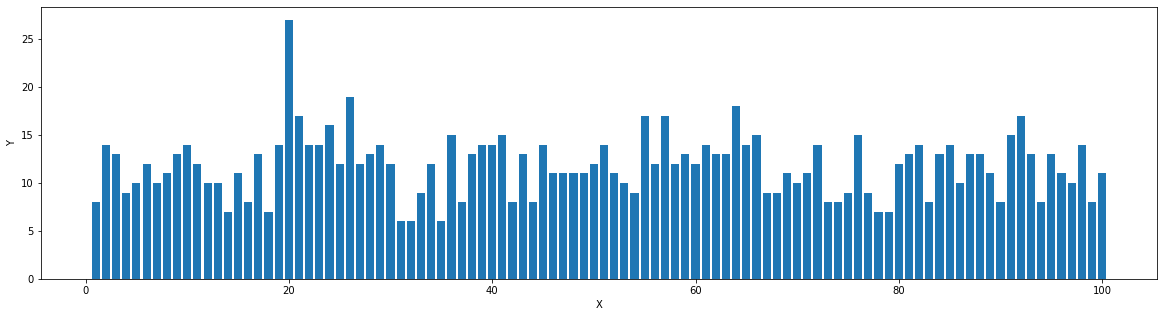

In [14]:
def drawHIST(list1):
    length=len(list1)
    list2 = list()
    for i in range(1, length+1):
        list2.append(i)
    plt.figure(figsize=(20,5))
    plt.bar(list2, list1)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    plt.close()

Game_Stats = Mafia_Game_withAllStats(2, 6, 1, 1, 100)
drawHIST(Game_Stats)

### Plot Chart

- 마피아는 1명과 시민만 있을 때, 경찰이 1명일 때, 메딕이 1명일 때의 차트

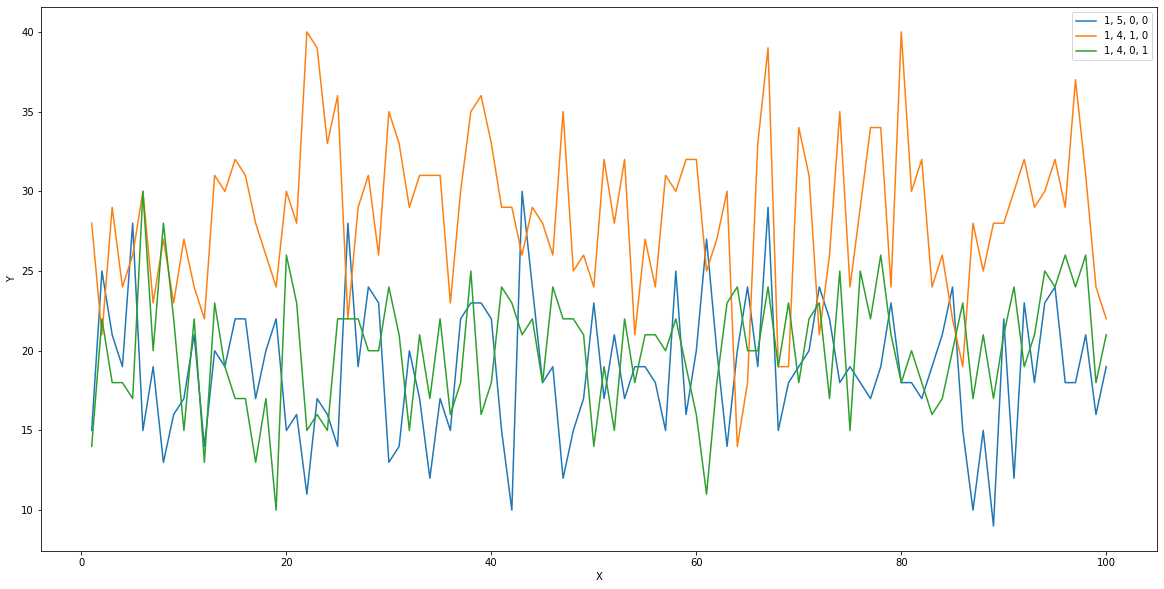

In [15]:
Game_Stats1 = Mafia_Game_withAllStats(1, 5, 0, 0, 100)
Game_Stats2 = Mafia_Game_withAllStats(1, 4, 1, 0, 100)
Game_Stats3 = Mafia_Game_withAllStats(1, 4, 0, 1, 100)
list0 = list()
length = len(Game_Stats1)
for i in range(1, length+1):
    list0.append(i)
    
plt.figure(figsize=(20,10))
plt.plot(list0, Game_Stats1, label="1, 5, 0, 0")
plt.plot(list0, Game_Stats2, label="1, 4, 1, 0")
plt.plot(list0, Game_Stats3, label="1, 4, 0, 1")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
plt.close()

### Plot Chart

- 마피아는 2명과 시민만 있을 때, 메딕이 3명일 때, 경찰이 3명일 때, 메딕과 경찰 모두 3명씩일 때의 차트

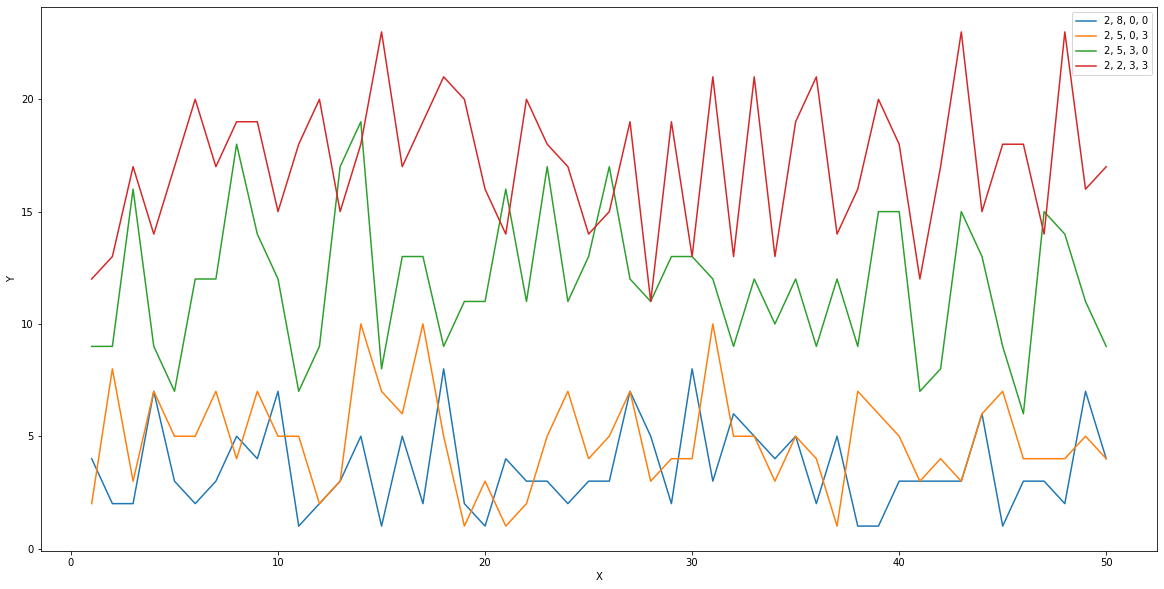

In [16]:
Game_Endday.clear()
Game_Stats1 = Mafia_Game_withAllStats(2, 8, 0, 0, 50)
Game_Stats2 = Mafia_Game_withAllStats(2, 5, 0, 3, 50)
Game_Stats3 = Mafia_Game_withAllStats(2, 5, 3, 0, 50)
Game_Stats4 = Mafia_Game_withAllStats(2, 2, 3, 3, 50)
list0 = list()
length = len(Game_Stats1)
for i in range(1, length+1):
    list0.append(i)
    
plt.figure(figsize=(20,10))
plt.plot(list0, Game_Stats1, label="2, 8, 0, 0")
plt.plot(list0, Game_Stats2, label="2, 5, 0, 3")
plt.plot(list0, Game_Stats3, label="2, 5, 3, 0")
plt.plot(list0, Game_Stats4, label="2, 2, 3, 3")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
plt.close()

### Plot Chart
- 위 상황에 대한 게임 종료일 나열
- 상황 1,2,3,4에 대해 5,000단위 구분

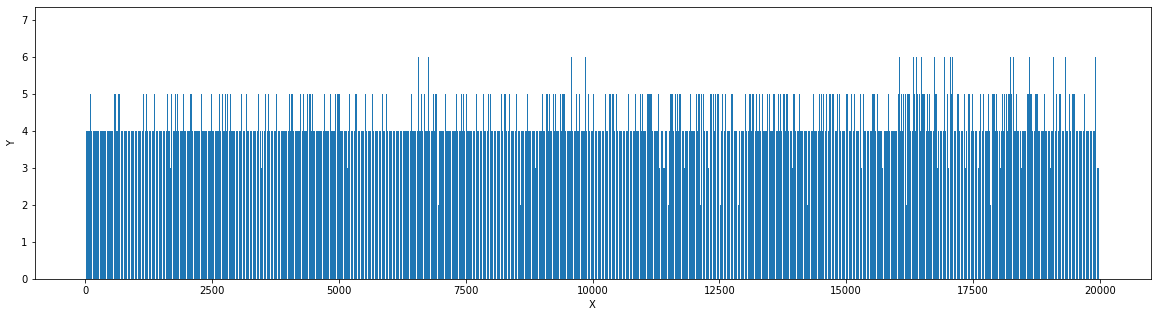

In [17]:
drawHIST(Game_Endday)
Game_Endday.clear()

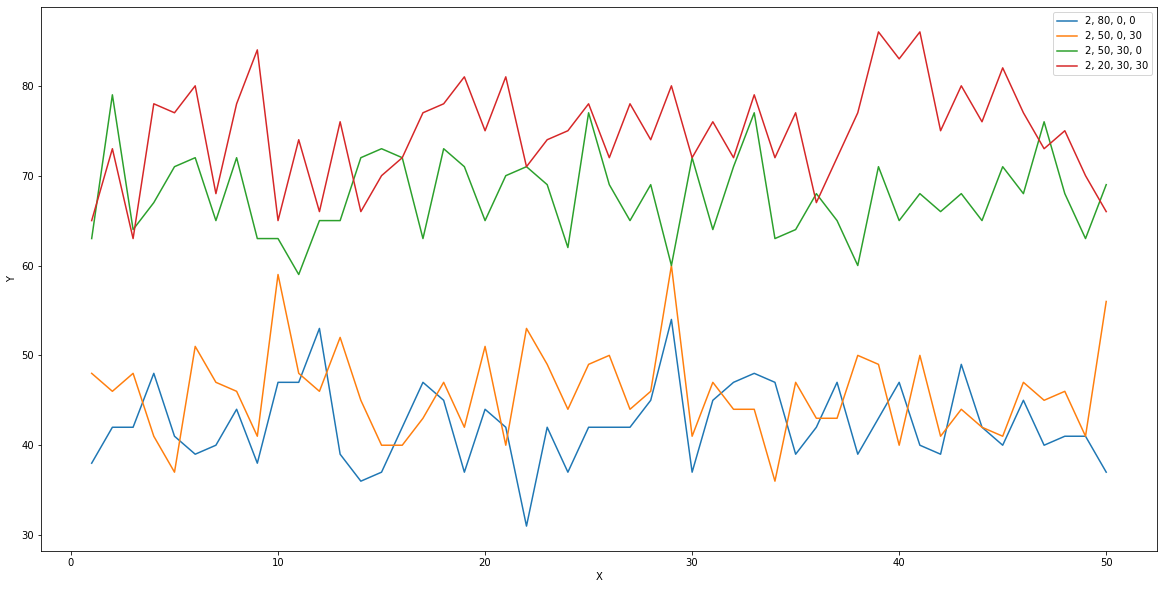

In [18]:
Game_Stats1 = Mafia_Game_withAllStats(2, 80, 0, 0, 50)
Game_Stats2 = Mafia_Game_withAllStats(2, 50, 0, 30, 50)
Game_Stats3 = Mafia_Game_withAllStats(2, 50, 30, 0, 50)
Game_Stats4 = Mafia_Game_withAllStats(2, 20, 30, 30, 50)

list0 = list()
length = len(Game_Stats1)
for i in range(1, length+1):
    list0.append(i)
    
plt.figure(figsize=(20,10))
plt.plot(list0, Game_Stats1, label="2, 80, 0, 0")
plt.plot(list0, Game_Stats2, label="2, 50, 0, 30")
plt.plot(list0, Game_Stats3, label="2, 50, 30, 0")
plt.plot(list0, Game_Stats4, label="2, 20, 30, 30")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
plt.close()

### Data Frame
- 경찰 3명을 포함한 전체 게임인원 100명 중 마피아의 비율(%)을 인덱스로 하여 확률을 나타냄

In [19]:
Game_participants=list()
col=["Citizens to Win(%)"]
Game = Mafia_Game_changewithAll(0, 94, 3, 3)[:20]
length=len(Game)
index = list()
for i in range(1, length+1):
    index.append(i)

df=pd.DataFrame(Game, index, columns=col)
df

,Citizens to Win(%)
1,85.0
2,61.0
3,46.0
4,27.0
5,16.0
6,19.0
7,9.0
8,3.0
9,7.0
10,2.0


### Histogram

- 경찰 3명을 포함한 전체 게임인원 각 10, 50, 100명
- x축은 마피아의 명 수, y축은 시민의 승률

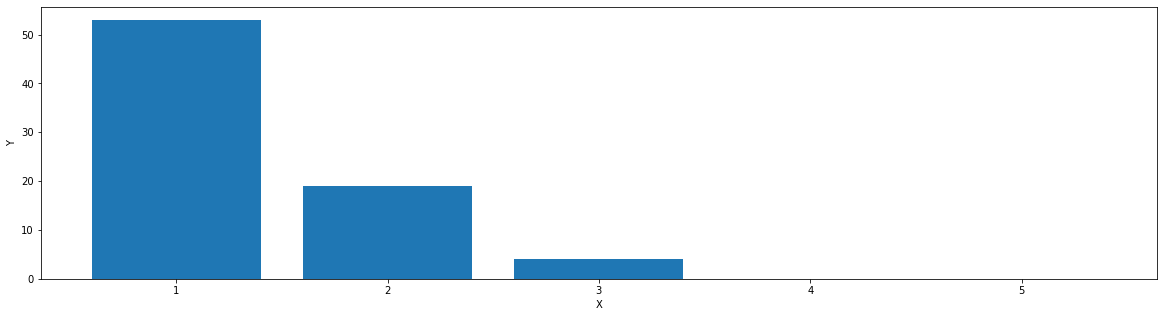

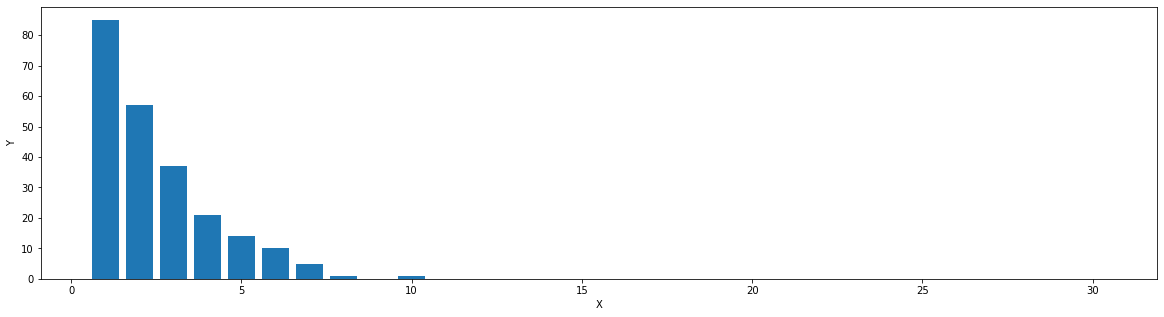

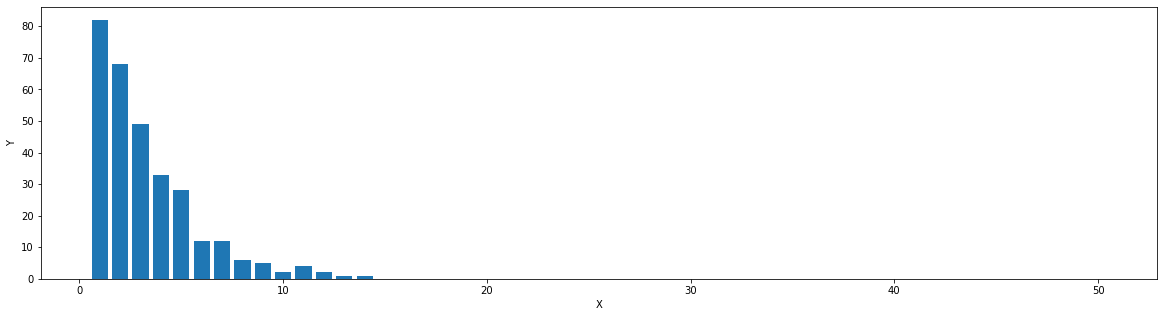

In [20]:
Game_Stats = Mafia_Game_changewithAll(0, 4, 3, 3)
drawHIST(Game_Stats)

Game_Stats = Mafia_Game_changewithAll(0, 54, 3, 3)
drawHIST(Game_Stats)

Game_Stats = Mafia_Game_changewithAll(0, 94, 3, 3)
drawHIST(Game_Stats)

### Histogram

- 전체 게임인원 50명, 경찰과 메딕의 비율을 조정
- x축은 마피아의 명 수, y축은 시민의 승률

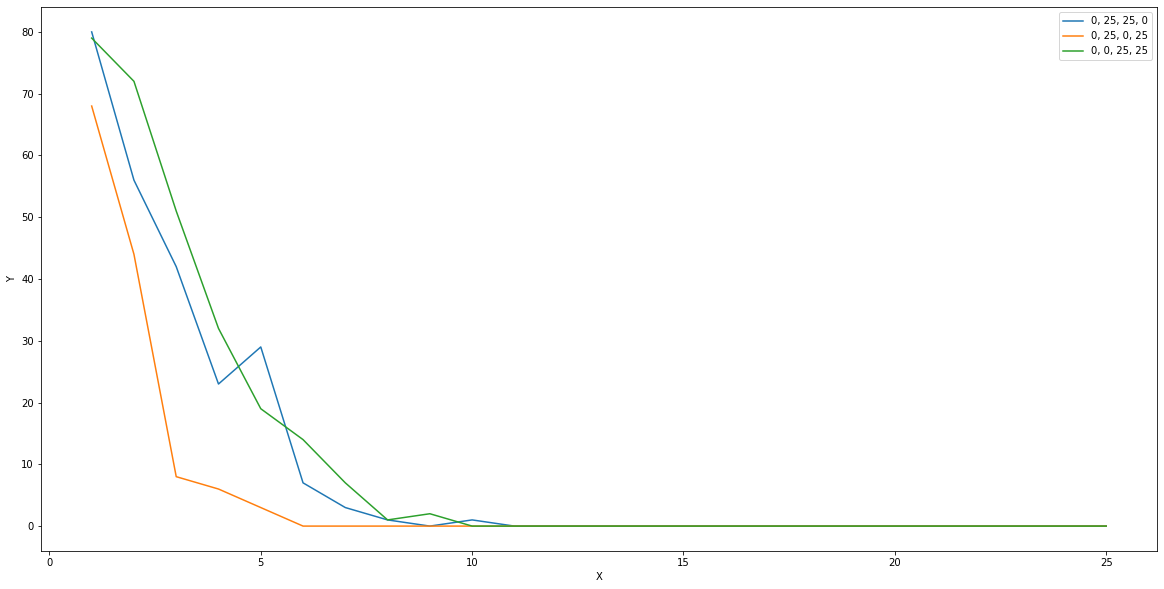

In [21]:
Game_Endday.clear()
Game_Stats1 = Mafia_Game_changewithAll(0, 25, 25, 0)
Game_Stats2 = Mafia_Game_changewithAll(0, 25, 0, 25)
Game_Stats3 = Mafia_Game_changewithAll(0, 0, 25, 25)

list0 = list()
length = len(Game_Stats1)
for i in range(1, length+1):
    list0.append(i)

plt.figure(figsize=(20,10))
plt.plot(list0, Game_Stats1, label="0, 25, 25, 0")
plt.plot(list0, Game_Stats2, label="0, 25, 0, 25")
plt.plot(list0, Game_Stats3, label="0, 0, 25, 25")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
plt.close()

### Plot Chart
- 위 상황에 대한 게임 종료일 나열
- 상황 1,2,3에 대해 2,500단위 구분

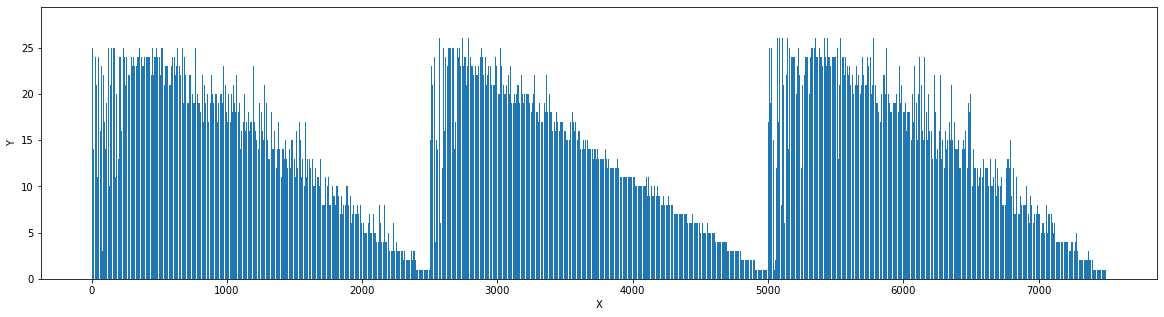

In [22]:
drawHIST(Game_Endday)
Game_Endday.clear()

### 분석
---
- 상황1 : 마피아, 시민, 경찰이 존재 할 때
    - 경찰의 수와 검거율에 따라 시민의 우승 확률에 영향을 줌
    - 검거율이 높으면 확정적으로 마피아를 잡을 수 있기 때문에 시민의 우승확률에 큰 영향을 줌
    - 마피아를 체포하고 시민의 동의를 받는다는 랜덤확률을 두 가지나 추가했기 때문에 확률의 편차가 크다
---
- 상황2 : 마피아, 시민, 메딕이 존재 할 때
    - 메딕의 수와 적중률에 따라 게임 진행시간에 영향을 줌
    - 밤에 치료할 확률이 높을수록 게임을 오래 끌고 가게 됨. 최대 2배까지 진행시간을 늘려준다
    - 메딕이 본인만 치료한다는 가정에도 낮투표에는 똑같은 방법으로 죽을 수 있음
    - 모든 상황이 랜덤일 때, 경찰이 존재 할 때보다 시민의 우승확률에 현저히 적은 기여를 한다
---
- 상황3 : 모든 직업이 다 존재 할 때
    - 세 가지 상황 중 동일 조건에서 시민의 우승 확률이 제일 높음
    - 메딕의 역할이 클 수록 게임이 오래 진행됨
    - 경찰의 역할이 클 수록 시민의 우승 확률이 상승
    - 메딕의 역할도 승률에 영향을 준다
---

## 제출 방법
* Due Date: 2021년 11월 26일 23시 59분
* LMS (https://myclass.ssu.ac.kr)에 제출합니다.
    * 파일은 STAT2021_PR1_20212021_홍길동.zip 형태로 부탁드립니다
    * 이 형태가 아닌 경우 제대로 제출되지 않을 수 있습니다.
    * 보고서 PDF파일과 소스코드를 압축해서 한 파일로 만들어주세요 (HWP로 내시면 화낼거에요)
    * 제발 간절히 부탁합니다. egg 혹은 alz는 쓰지 말아주세요... (감점할거에요 -_-+)
    * 제대로 전송이 안되면 개별 파일을 따로 올리셔도 됩니다.
    * 구현체는 제대로 작동을 하면 어떤 형태도 좋습니다.
    * 점수의 차이는 주로 해 보신 실험과 보고서에서 있을 것입니다. 재밌는 실험 많이 해보세요. 굿럭!